# Propiedades de la Transformada de Fourier discreta

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Propiedades de la DFT

Para efectos de las siguientes propiedades de la DFT utilizaremos, las siguientes definiciones:

\begin{equation}
\boxed{\tilde{F}[k] = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{f}[n] \; e^{-i k \frac{2 \pi}{N} n} = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{f}[n] \; W_N^{k n} }
\end{equation}

\begin{equation}
\boxed{\tilde{f}[n] = \sum_{k=0}^{N-1} \tilde{F}[k] \; e^{i k \frac{2 \pi}{N} n} = \sum_{n=0}^{N-1} \tilde{f}[n] \; W_N^{-k n}}
\end{equation}

***
### Dualidad

$$ \text{DFT}_N \{ \text{DFT}_N\{\tilde{f}[n]\} \} = \frac{1}{N}\tilde{f}[-n] $$


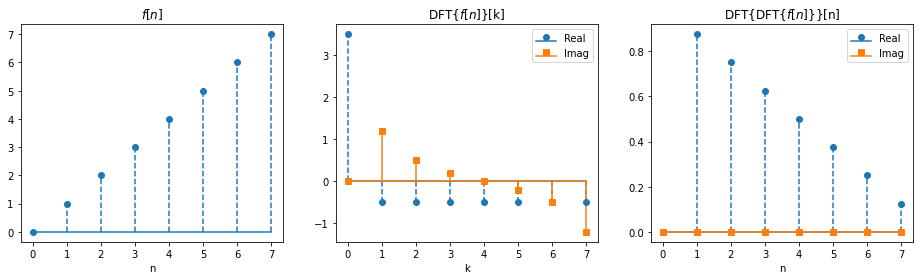

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
f = np.arange(N)*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa
F_dual = sys_functions.DFT(F) # Aplicamos la dualidad, al tomar la DFT de F

plt.figure(figsize = (16, 4))

plt.subplot(131)
sys_functions.plotSequence(f,'$f[n]$')
plt.title('$f[n]$')

plt.subplot(132)
sys_functions.plotSequence(F,'DFT{$f[n]$}[k]',xlabel='k')

plt.subplot(133)
sys_functions.plotSequence(F_dual,'DFT{DFT{$f[n]$}}[n]')
plt.show()

### Conjugado

$$ \tilde{f}^{*}[n] \rightarrow \tilde{F}^{*}[-k] $$


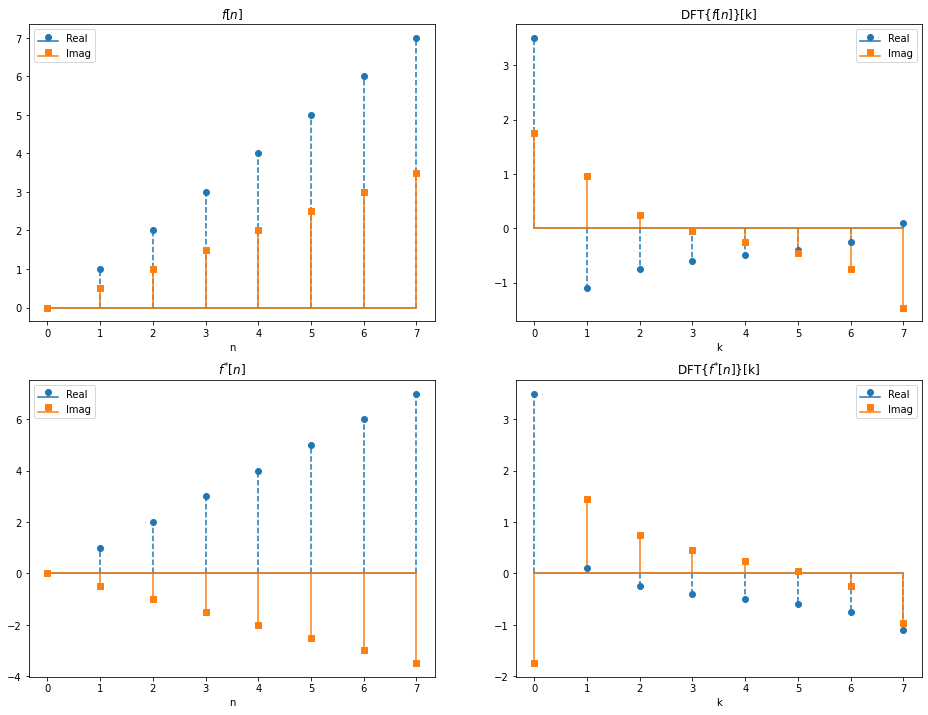

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
f = np.arange(N)*np.ones(N) + 0.5*1j*np.arange(N)*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa
f_conj = np.conj(f)
F_conj = sys_functions.DFT(f_conj) # DFT del conjugado

plt.figure(figsize = (16, 12))

plt.subplot(221)
sys_functions.plotSequence(f,'$f[n]$')
plt.title('$f[n]$')

plt.subplot(222)
sys_functions.plotSequence(F,'DFT{$f[n]$}[k]',xlabel='k')

plt.subplot(223)
sys_functions.plotSequence(f_conj,'$f^{*}[n]$')

plt.subplot(224)
sys_functions.plotSequence(F_conj,'DFT{$f^{*}[n]$}[k]',xlabel='k')
plt.show()

### Inversión o espejamiento en las muestras

$$ \tilde{f}[-n] \rightarrow \tilde{F}[-k] $$

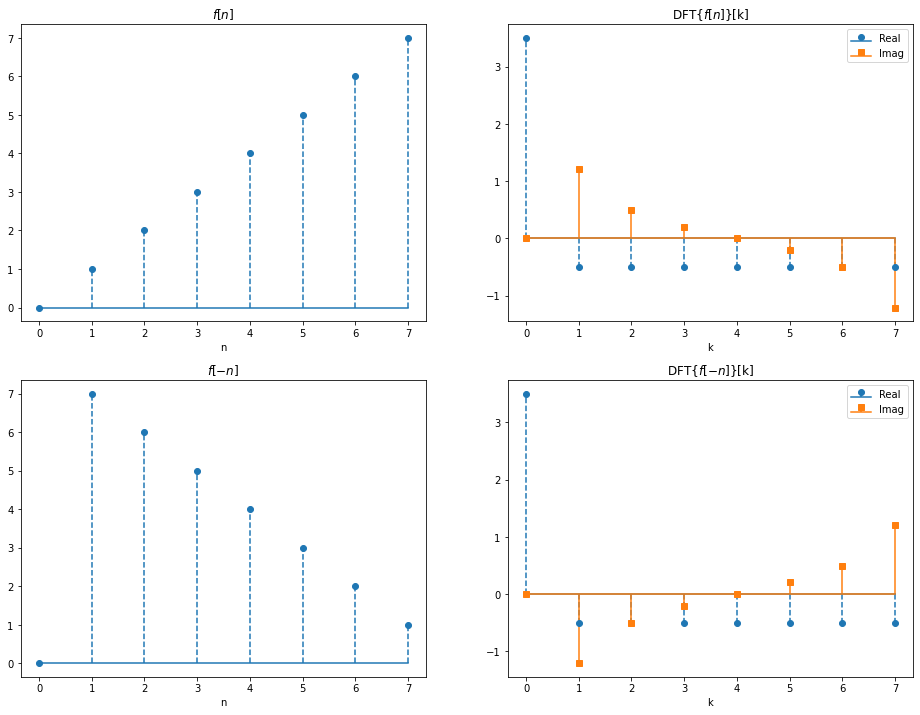

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
samples = np.arange(N)
f = np.arange(N)*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa
f_inv = f[-samples] # señal inversa
F_inv = sys_functions.DFT(f_inv) # DFT de la señal inversa

plt.figure(figsize = (16, 12))

plt.subplot(221)
sys_functions.plotSequence(f,'$f[n]$')
plt.title('$f[n]$')

plt.subplot(222)
sys_functions.plotSequence(F,'DFT{$f[n]$}[k]',xlabel='k')

plt.subplot(223)
sys_functions.plotSequence(f_inv,'$f[-n]$')

plt.subplot(224)
sys_functions.plotSequence(F_inv,'DFT{$f[-n]$}[k]',xlabel='k')
plt.show()

### Superposición

$$ \tilde{f}[n] + \tilde{g}[n] \rightarrow \tilde{F}[k] + \tilde{G}[k] $$

si es que $f$ y $g$ tienen el mismo período.



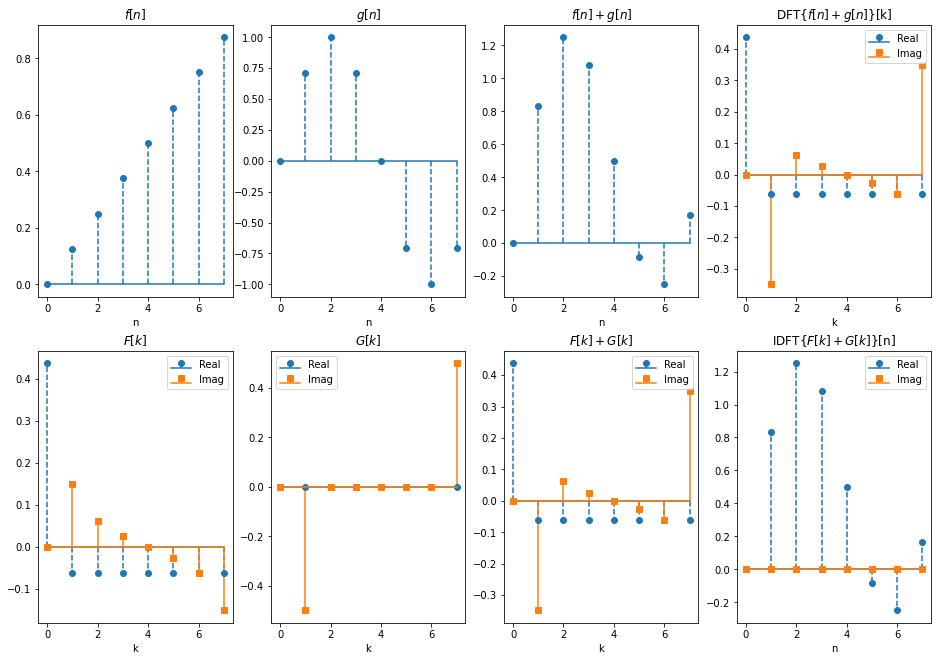

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
samples = np.arange(N)
f = (1/N)*samples*np.ones(N) # señal rampa
g = np.sin(2*np.pi*samples/N) # señal sinusoide
F = sys_functions.DFT(f) # DFT de la señal rampa
G = sys_functions.DFT(g) # DFT de la señal sinusoide

f_suma = f + g # Suma de ambas señales
F_suma = F + G # Suma de los espectros

DFT_f_suma = sys_functions.DFT(f_suma) # DFT de la suma
IDFT_F_suma = sys_functions.IDFT(F_suma) # DFT inversa de la suma

plt.figure(figsize = (16, 11))

plt.subplot(241)
sys_functions.plotSequence(f,'$f[n]$')

plt.subplot(242)
sys_functions.plotSequence(g,'$g[n]$')

plt.subplot(243)
sys_functions.plotSequence(f_suma,'$f[n] + g[n]$')

plt.subplot(244)
sys_functions.plotSequence(DFT_f_suma,'DFT{$f[n] + g[n]$}[k]',xlabel='k')

plt.subplot(245)
sys_functions.plotSequence(F,'$F[k]$',xlabel='k')

plt.subplot(246)
sys_functions.plotSequence(G,'$G[k]$',xlabel='k')

plt.subplot(247)
sys_functions.plotSequence(F_suma,'$F[k] + G[k]$',xlabel='k')

plt.subplot(248)
sys_functions.plotSequence(IDFT_F_suma,'IDFT{$F[k] + G[k]$}[n]')

plt.show()

### Desplazamiento 

$$ \tilde{f}[n-a] \rightarrow e^{i2\pi ka/N}\tilde{F}[k] $$

con $a \in \mathbb{Z}$

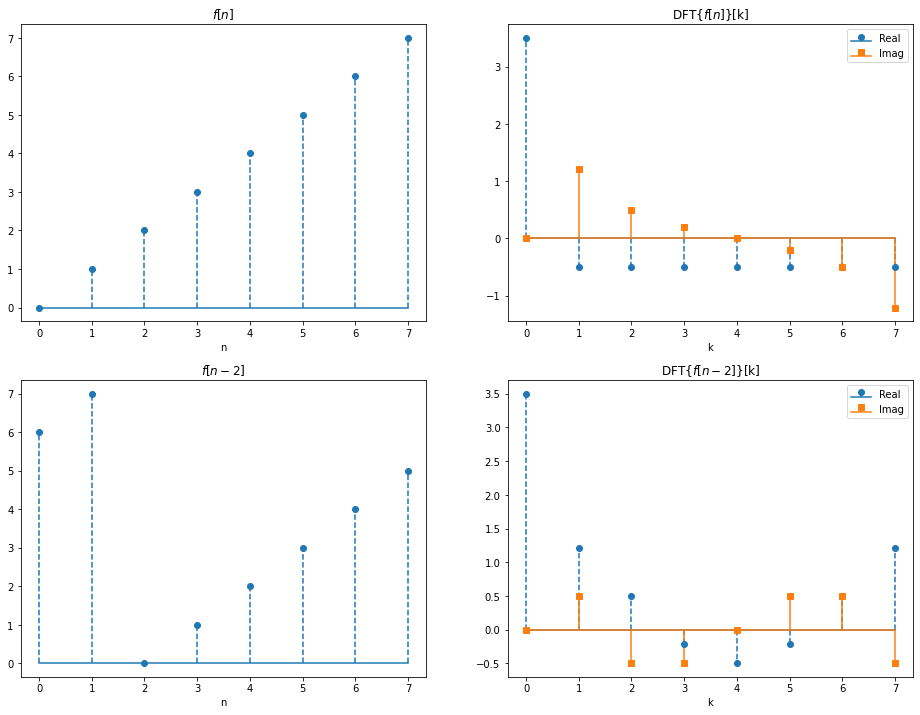

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
samples = np.arange(N)
f = np.arange(N)*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa
f_desp = f[samples-2] # señal desplazada
F_desp = sys_functions.DFT(f_desp) # DFT de la señal desplazada

plt.figure(figsize = (16, 12))

plt.subplot(221)
sys_functions.plotSequence(f,'$f[n]$')

plt.subplot(222)
sys_functions.plotSequence(F,'DFT{$f[n]$}[k]',xlabel='k')

plt.subplot(223)
sys_functions.plotSequence(f_desp,'$f[n-2]$')

plt.subplot(224)
sys_functions.plotSequence(F_desp,'DFT{$f[n-2]$}[k]',xlabel='k')
plt.show()

### Operador diferencial

$$ \tilde{f}[n] - \tilde{f}[n-a] \rightarrow (1 - e^{-i 2 \pi ka/N})\tilde{F}[k] $$

con $a \in \mathbb{Z}$ y $[n-a] = (n - a) \text{mod} N$.

### Suma

$$ \sum_{\kappa=0}^{N} \tilde{f}[\kappa] \rightarrow \frac{ \tilde{F}[k] - \tilde{F}[0]}{1 - e^{-i2 \pi k/N}} \; \; \; \text{para } k \neq 0 $$

El valor en 0 es 

$$ \tilde{F}[0] = \frac{1}{N}\sum_{n=0}^{N-1}\sum_{\kappa=0}^{n} \tilde{f}[\kappa] $$

### Convolución cíclica,  periódica o circular

$$ \tilde{f}[n] \circledast_{N} \tilde{g}[n] \rightarrow N \tilde{F}[k]\tilde{G}[k] $$

Esta propiedad dice que, para el caso de señales periódicas, la multiplicación de las DFTs de dos señales periódicas es equivalente a la convolución cíclica entre ambas señales, no la convolución lineal. Por lo tanto no es posible utilizar esta propiedad para calcular la salida de un sistema tomando las DFTs de la entrada y la respuesta al impulso y después multiplicando. Sin embargo, [bajo ciertas condiciones la convolución cíclica puede ser utilizada para calcular la convolución lineal](./28-Convolucion_discreta.ipynb#equivalencia_lineal_periodica). Esto se logra mediante el [acolchamiento](#acolchamiento) de ambas señales.

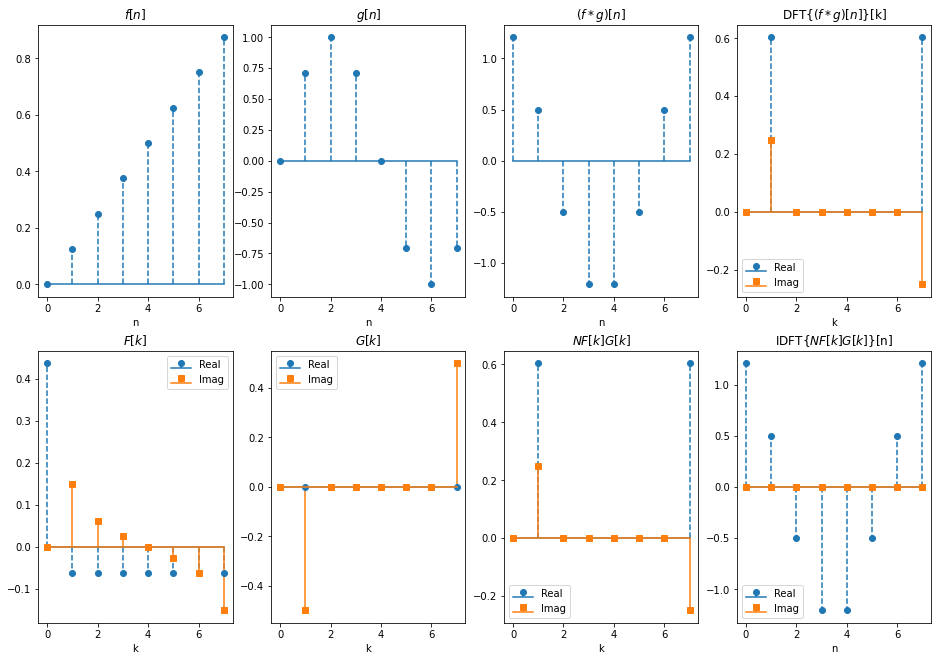

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
samples = np.arange(N)
f = (1/N)*samples*np.ones(N) # señal rampa
g = np.sin(2*np.pi*samples/N) # señal sinusoide
F = sys_functions.DFT(f) # DFT de la señal rampa
G = sys_functions.DFT(g) # DFT de la señal sinusoide

f_conv = sys_functions.circularConvolution(f,g) # Convolucion circular de ambas señales
F_mult = N * (F * G) # Multiplicacion de los espectros

DFT_f_conv = sys_functions.DFT(f_conv) # DFT de la convolución
IDFT_F_mult = sys_functions.IDFT(F_mult) # DFT inversa de la multiplicación

plt.figure(figsize = (16, 11))

plt.subplot(241)
sys_functions.plotSequence(f,'$f[n]$')
plt.title('$f[n]$')

plt.subplot(242)
sys_functions.plotSequence(g,'$g[n]$')

plt.subplot(243)
sys_functions.plotSequence(f_conv,'$(f * g)[n]$')

plt.subplot(244)
sys_functions.plotSequence(DFT_f_conv,'DFT{$(f * g)[n]$}[k]',xlabel='k')

plt.subplot(245)
sys_functions.plotSequence(F,'$F[k]$',xlabel='k')

plt.subplot(246)
sys_functions.plotSequence(G,'$G[k]$',xlabel='k')

plt.subplot(247)
sys_functions.plotSequence(F_mult,'$N F[k]G[k]$',xlabel='k')

plt.subplot(248)
sys_functions.plotSequence(IDFT_F_mult,'IDFT{$N F[k]G[k]$}[n]')

plt.show()

### Producto

$$ \tilde{f}[n] \tilde{g}[n] \rightarrow \tilde{F}[k] \circledast_{N} \tilde{G}[k] $$

para señales del mismo período $N$.

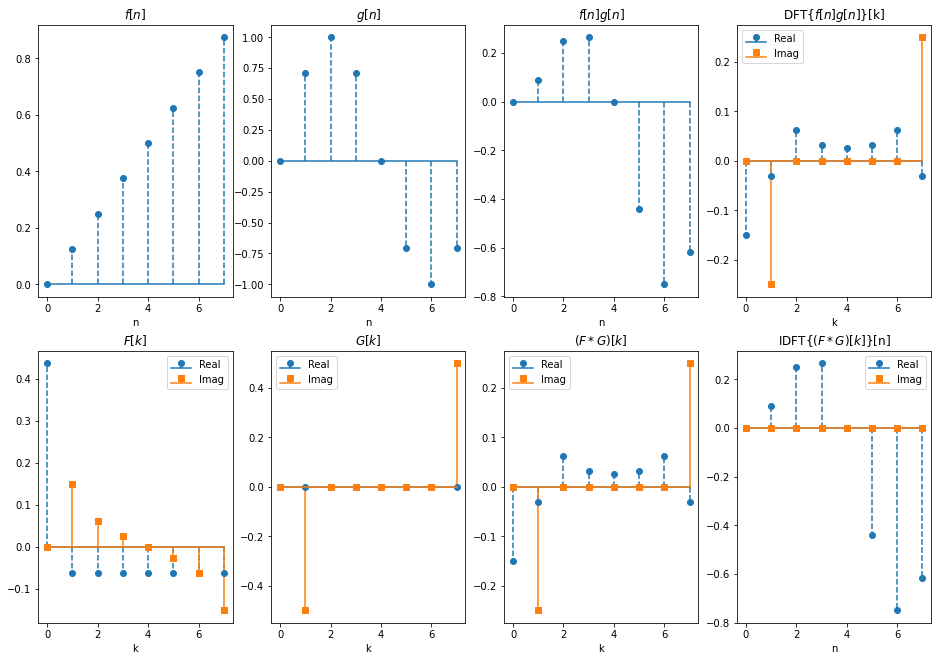

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 8  # largo de la señal
samples = np.arange(N)
f = (1/N)*samples*np.ones(N) # señal rampa
g = np.sin(2*np.pi*samples/N) # señal sinusoide
F = sys_functions.DFT(f) # DFT de la señal rampa
G = sys_functions.DFT(g) # DFT de la señal sinusoide

f_mult = f * g # Multiplicacion de las señales
F_conv = sys_functions.circularConvolution(F,G) # Convolucion circular de ambos espectros

DFT_f_mult = sys_functions.DFT(f_mult) # DFT de la convolución
IDFT_F_conv = sys_functions.IDFT(F_conv) # DFT inversa de la multiplicación

plt.figure(figsize = (16, 11))

plt.subplot(241)
sys_functions.plotSequence(f,'$f[n]$')

plt.subplot(242)
sys_functions.plotSequence(g,'$g[n]$')

plt.subplot(243)
sys_functions.plotSequence(f_mult,'$f[n] g[n]$')

plt.subplot(244)
sys_functions.plotSequence(DFT_f_mult,'DFT{$f[n] g[n]$}[k]',xlabel='k')

plt.subplot(245)
sys_functions.plotSequence(F,'$F[k]$',xlabel='k')

plt.subplot(246)
sys_functions.plotSequence(G,'$G[k]$',xlabel='k')

plt.subplot(247)
sys_functions.plotSequence(F_conv,'$(F * G)[k]$',xlabel='k')

plt.subplot(248)
sys_functions.plotSequence(IDFT_F_conv,'IDFT{$(F * G)[k]$}[n]')

plt.show()

### Area

$$ \sum_{n=0}^{N-1} \tilde{f}[n] = N\tilde{F}[0] $$

In [8]:
import numpy as np
import sys_functions

%matplotlib inline

N = 16  # largo de la señal
samples = np.arange(N)
f = (1/N)*samples*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa

print('Suma de los elementos de la señal original: {:.2f}',format(np.sum(f)))
print('N F[0]: {:.2f}'.format(N*np.real(F[0])))

Suma de los elementos de la señal original: {:.2f} 7.5
N F[0]: 7.50


### Valor central

$$ \tilde{f}[0] = \sum_{k=0}^{N-1}\tilde{F}[k] $$

In [9]:
import numpy as np
import sys_functions

%matplotlib inline

N = 16  # largo de la señal
samples = np.arange(N)
f = (1/N)*samples*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa

print('f[0]: {:.2f}'.format(f[0]))
print('Suma de las muestras del espectro: {:.2f}'.format(np.sum(F)))

f[0]: 0.00
Suma de las muestras del espectro: 0.00+0.00j


### Rayleigh o Energía

$$ \sum_{n=0}^{N-1} |\tilde{f}[n]|^2 = N \sum_{k=0}^{N-1} |\tilde{F}[k]|^2 $$

In [10]:
import numpy as np
import sys_functions

%matplotlib inline

N = 16  # largo de la señal
samples = np.arange(N)
f = (1/N)*samples*np.ones(N) # señal rampa
F = sys_functions.DFT(f) # DFT de la señal rampa

print('Suma de las muestras de la señal (módulo cuadrado): {:.2f}'.format(np.sum(np.abs(f)*np.abs(f))))
print('Suma de las muestras del espectro (módulo cuadrado), multiplicada por N: {:.2f}'.format(N*np.sum(np.abs(F)*np.abs(F))))

Suma de las muestras de la señal (módulo cuadrado): 4.84
Suma de las muestras del espectro (módulo cuadrado), multiplicada por N: 4.84


<a name="acolchamiento"></a>
### Acolchamiento (zero padding)
El acolchamiento consiste en extender el largo de una señal mediante la inserción de ceros hasta completar un nuevo largo. El resultado de esta operación en el dominio de la frecuencia es que el espectro se interpola con nuevas muestras, de acuerdo a cuantos ceros se insertan.

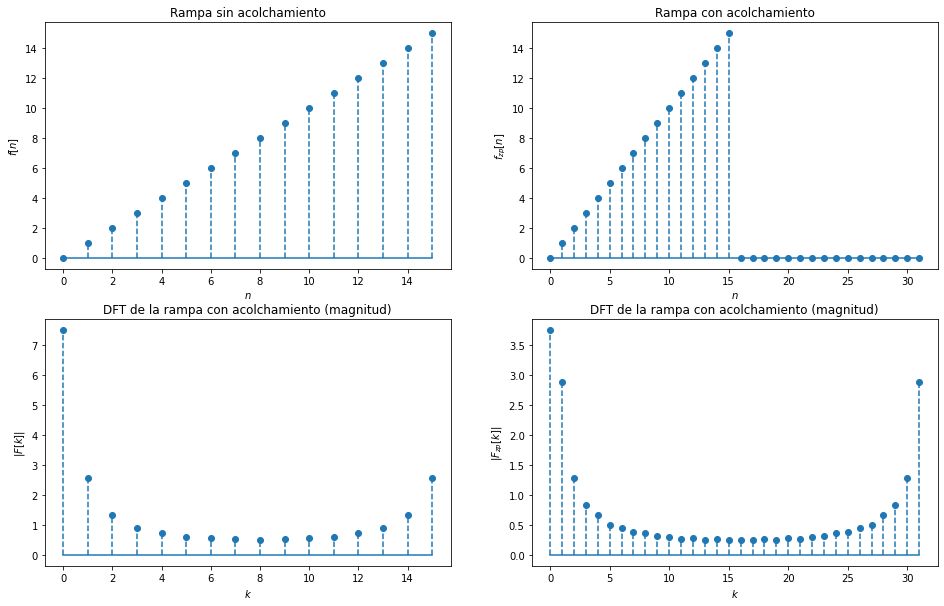

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 16  # largo de la señal original
M = 32  # largo de la señal acolchada

f = np.arange(N)*np.ones(N) # señal original
F = np.abs(sys_functions.DFT(f)) #DFT de la señal original (magnitud)
fzp = np.concatenate((f, np.zeros(M-N))) #señal acolchada
Fzp = np.abs(sys_functions.DFT(fzp)) #DFT de la señal acolchada (magnitud)

plt.figure(figsize = (16, 10))

plt.subplot(221)
sys_functions.plotSequence(f,'Rampa sin acolchamiento',xlabel='$n$',ylabel='$f[n]$')

plt.subplot(222)
sys_functions.plotSequence(fzp,'Rampa con acolchamiento',xlabel='$n$',ylabel='$f_{zp}[n]$')

plt.subplot(223)
sys_functions.plotSequence(F,'DFT de la rampa con acolchamiento (magnitud)',xlabel='$k$',ylabel='$|F[k]|$')

plt.subplot(224)
sys_functions.plotSequence(Fzp,'DFT de la rampa con acolchamiento (magnitud)',xlabel='$k$',ylabel='|$F_{zp}[k]$|')

### Estiramiento 
El estiramiento consiste en extender el largo de una señal mediante la inserción de ceros muestra por medio, hasta completar un nuevo largo. El resultado de esta operación en el dominio de la frecuencia es que el espectro se replica tantas veces como muestras por medio se han agregado ceros.

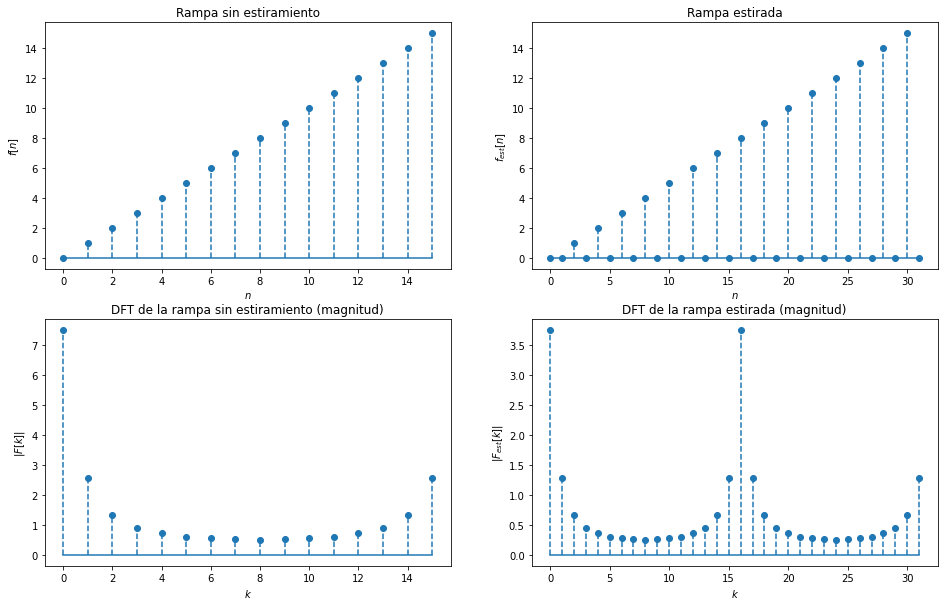

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 16  # largo de la señal original
M = 32  # largo de la señal estirada

f = np.arange(N)*np.ones(N) # señal original
F = np.abs(sys_functions.DFT(f)) # DFT de la señal original (magnitud)

z = np.zeros(N)
fest = np.dstack((f,z)).flatten() #señal estirada
Fest = np.abs(sys_functions.DFT(fest)) # DFT de la señal estirada (magnitud)


plt.figure(figsize = (16, 10))

plt.subplot(221)
sys_functions.plotSequence(f,'Rampa sin estiramiento',xlabel='$n$',ylabel='$f[n]$')

plt.subplot(222)
sys_functions.plotSequence(fest,'Rampa estirada',xlabel='$n$',ylabel='$f_{est}[n]$')

plt.subplot(223)
sys_functions.plotSequence(F,'DFT de la rampa sin estiramiento (magnitud)',xlabel='$k$',ylabel='$|F[k]|$')

plt.subplot(224)
sys_functions.plotSequence(Fest,'DFT de la rampa estirada (magnitud)',xlabel='$k$',ylabel='|$F_{est}[k]$|')


<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>